In [19]:
import pytesseract
from PIL import Image, ImageOps
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract'

In [21]:
def show_image(title, image):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

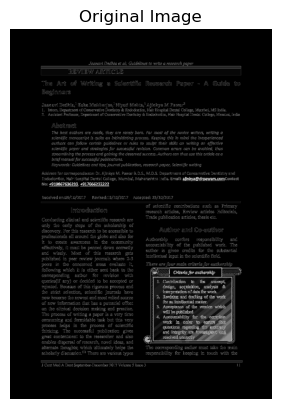

In [22]:
image_path = 'largepreview.png'
image = Image.open(image_path)
show_image('Original Image', np.array(image))

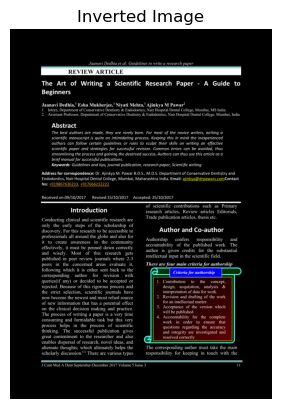

In [23]:
#Invert Image
inverted_image = ImageOps.invert(image.convert('RGB'))
show_image('Inverted Image', np.array(inverted_image))

In [24]:
#Rescaling (if needed)
width, height = inverted_image.size
max_size = 10000
if max(width, height) > max_size:
    scaling_factor = max_size / float(max(width, height))
    new_size = (int(width * scaling_factor), int(height * scaling_factor))
    rescaled_image = inverted_image.resize(new_size, Image.ANTIALIAS)
    show_image('Rescaled Image', np.array(rescaled_image))
else:
    rescaled_image = inverted_image

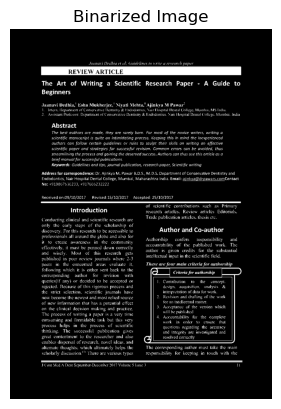

In [25]:
#Binarization
gray_image = rescaled_image.convert('L')
_, binarized_image = cv2.threshold(np.array(gray_image), 128, 255, cv2.THRESH_BINARY)
show_image('Binarized Image',np.array( binarized_image))


In [26]:
# def has_noise(image):
#     return cv2.Laplacian(np.array(image), cv2.CV_64F).var() > 50

# if has_noise(binarized_image):
#     noise_removed_image = cv2.fastNlMeansDenoising(np.array(binarized_image), None, 30, 7, 21)
#     show_image('Noise Removed Image', noise_removed_image)
# else:
#     noise_removed_image = binarized_image

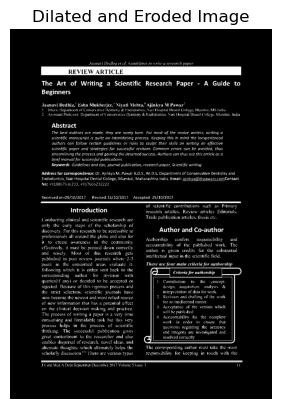

In [27]:
# Step 5: Dilation and Erosion
kernel = np.ones((1, 1), np.uint8)
dilated_image = cv2.dilate(binarized_image, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)
show_image('Dilated and Eroded Image', eroded_image)